In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

In [2]:
# Loading data
path = '/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/ParkinsonProject/'
X = pd.read_csv(path + 'X.csv')
y = pd.read_csv(path + 'y.csv')

## Model Training
#### Splitting the data to training data & valid data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

- Applying PCA to down the size of the data.

In [4]:
from sklearn.decomposition import PCA
#Make an instance of the model
pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

4

In [5]:
#Apply the mapping (transform) to both the training set and the valid set
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)

### 1. Create model

- ### K-Nearest Neighbors
- - #### Selecting the K value

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k_list = []
acc_list = []
for K_value in range(1, int(y_train.shape[0]**0.5)): #k = sqrt(n)/2
    k_list.append(K_value)
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    acc_list.append(acc)
    print(f'Accuracy= {accuracy_score(y_valid, y_pred)*100}% for K_value {K_value}')

Accuracy= 89.1891891891892% for K_value 1
Accuracy= 86.48648648648648% for K_value 2
Accuracy= 89.1891891891892% for K_value 3
Accuracy= 91.8918918918919% for K_value 4
Accuracy= 91.8918918918919% for K_value 5
Accuracy= 91.8918918918919% for K_value 6
Accuracy= 86.48648648648648% for K_value 7
Accuracy= 89.1891891891892% for K_value 8
Accuracy= 83.78378378378379% for K_value 9
Accuracy= 86.48648648648648% for K_value 10
Accuracy= 83.78378378378379% for K_value 11


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [7]:
where = acc_list.index(max(acc_list))
k = k_list[where]

print(f"\nThe optimal number of neighbors= {k, acc_list[where]}%")


The optimal number of neighbors= (4, 91.8918918918919)%


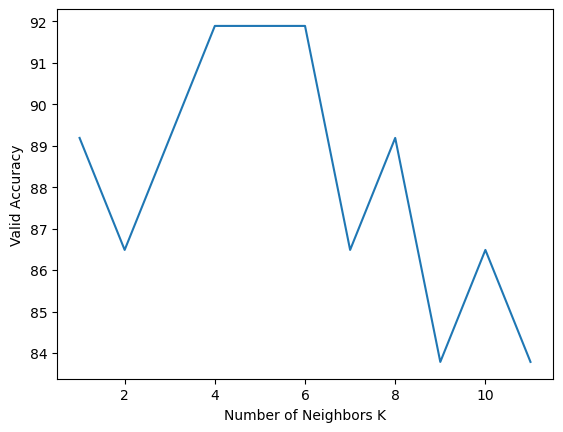

In [8]:
import matplotlib.pyplot as plt
plt.plot(k_list, acc_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Valid Accuracy')
plt.show()

#### Applying the K value (4) for the Model

In [9]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2. Validate model

In [10]:
print(mean_absolute_error(y_valid, y_pred))

0.08108108108108109


### 3. Evaluate model
#### Accuracy Score

In [11]:
# accuracy score on the valid data
print(f'Accuracy score of valid data: {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data: {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data: 0.918918918918919
Accuracy score of training data: 0.8958333333333334


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 91.8918918918919%
The train score of training data= 89.58333333333334%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [13]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[14  2]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.91      0.95      0.93        21

    accuracy                           0.92        37
   macro avg       0.92      0.91      0.92        37
weighted avg       0.92      0.92      0.92        37



In [14]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.9090909090909091
Recall= 0.9523809523809523


In [15]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_valid.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0


-  ### K-Means (Unsupervised Learning)
- #### Determining K

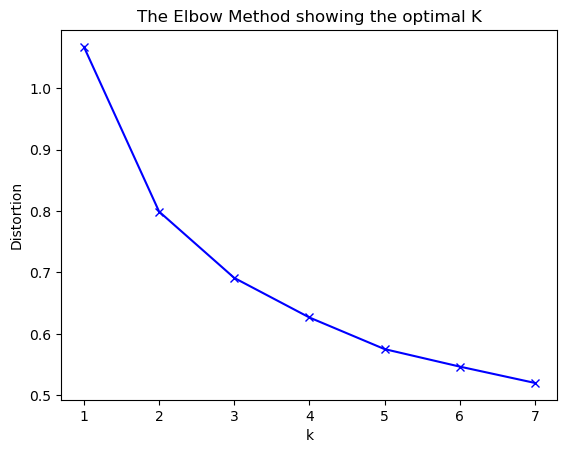

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])

#plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

>We will select K = 2.
#### Applying the K value (2) for the Model

In [17]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [18]:
centroids = model.cluster_centers_
labels = model.labels_
print(centroids)
print(labels)

[[ 4.89867042e+00  5.13443430e+00  4.53932298e+00  6.51914894e-03
   5.52203830e-01  7.27408660e-01 -5.06192751e+00  2.62494500e-01
   2.44798560e+00]
 [ 5.10759734e+00  5.26295644e+00  4.85112007e+00  3.63000000e-03
   4.30047644e-01  7.08681299e-01 -6.62885107e+00  1.75080126e-01
   2.22231544e+00]]
[0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0]


In [19]:
print(mean_absolute_error(y, labels))

0.7237569060773481


In [20]:
print(accuracy_score(y, labels))

0.27624309392265195


In [21]:
print(confusion_matrix(y, labels))
print(classification_report(y, labels))

[[ 5 42]
 [89 45]]
              precision    recall  f1-score   support

           0       0.05      0.11      0.07        47
           1       0.52      0.34      0.41       134

    accuracy                           0.28       181
   macro avg       0.29      0.22      0.24       181
weighted avg       0.40      0.28      0.32       181



In [22]:
print(f'Precision= {precision_score(y, labels)}')
print(f'Recall= {recall_score(y, labels)}')

Precision= 0.5172413793103449
Recall= 0.3358208955223881
